<a href="https://colab.research.google.com/github/Abi-Lowkey/MachineLearningTasks/blob/main/7thWeekTasks/XGBoost_on_melb_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ketut Satria Wibisana

NIM : 1103213148

Lecture Week 7 : XGBoost


Dataset : melb_data.csv

Dokumentasi Chat GPT : [Link](https://chatgpt.com/share/673641df-50e8-8010-9dc4-5cc869d41540)

Learn on how to build and optimize model with **gradient boosting.**

#Introduction
By definition, **ensemble methods** combine the predictions of several models (e.g., several trees, in the case of random forest).

Now, we'll learn about another ensemble method called gradient boosting.

#Difference of Decision Tree, Random Forest, and XGBoost

1. Decision Tree:
A decision tree is a simple and interpretable model that recursively splits the data into subsets based on the feature values. It forms a tree-like structure where each internal node represents a test on a feature, each branch represents the outcome of that test, and each leaf node represents the final prediction. The decision tree makes binary decisions at each node to split the data. It is prone to overfitting, especially when the tree becomes deep, capturing noise and leading to poor generalization on unseen data.

2. Random Forest:
Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions through voting (for classification) or averaging (for regression). Each decision tree is trained on a random subset of the data (bootstrap sample) and a random subset of the features. This randomness reduces overfitting and increases the model's ability to generalize to new data.

3. XGBoost (Extreme Gradient Boosting):
XGBoost is an optimized implementation of the Gradient Boosting algorithm. It creates an ensemble of weak learners (usually shallow decision trees) sequentially, where each new model corrects the errors made by the previous one. XGBoost uses a gradient-based optimization algorithm to minimize a loss function while adding new trees to the ensemble. It also includes regularization terms to control overfitting and speed up the training process. XGBoost is known for its high performance, scalability, and efficiency, making it popular in various machine learning competitions and real-world applications.
**XGBoost** is an implementation of gradient boosting with several additional features focused on perfmance and speed. The final result of an XGBoost model is a weighted sum of the predictions made by all the individual trees in the sequence. The contribution of each tree is adjusted during training based on how well it reduces the overall error.


Note:

* Regularization (penyederhanaan): XGBoost introduces regularization terms to control overfitting during the training process. Regularization helps prevent the model from becoming too complex and ensures better generalization to unseen data.


#Gradient Boosting

**Gradient boosting** is a method that goes through cycles to iteratively add models into an ensemble (setelan).

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent (kemudian) additions to the ensemble will address those errors.)

Then, we start the cycle:
1. First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we **add the predictions from all models** in the ensemble.
2. These predictions are used to calculate a loss function (like mean squared error, for instance).
3. Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss.
4. Finally, we add the new model to ensemble, and ...
5. Repeat!

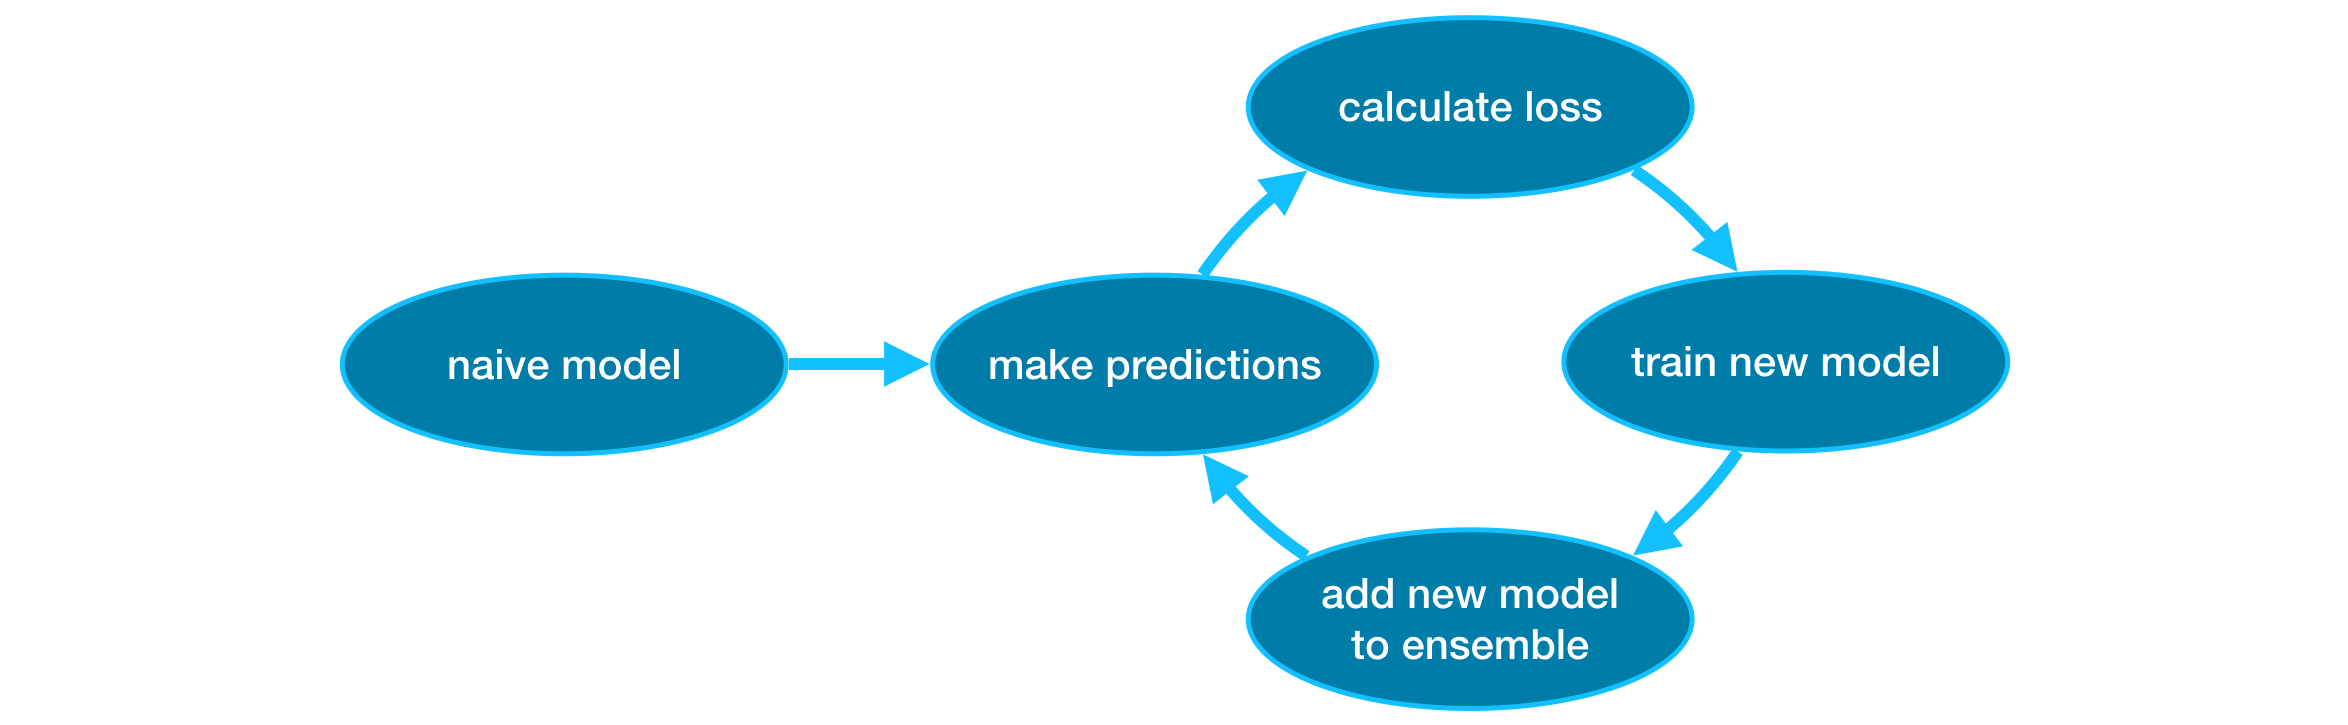

#Example
We begin by loading the training and validation data in X_train, X_valid, y_train, y_valid.

**Prompt:**

Write a code cell to mount Google Drive in Colab.

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Prompt:**

Write a code cell to read a CSV file from Google Drive into a DataFrame.

In [4]:
import pandas as pd

# Replace 'your-file-path.csv' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/Dataset/melb_data.csv'

# Load the CSV into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


**Prompt:**

Write a code cell to select a subset of predictors ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt'] and set the target variable ['Price'] from the DataFrame.

In [5]:
# Selecting the predictors
predictors = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = df[predictors]

# Setting the target variable
y = df['Price']

# Displaying the first few rows of the predictors and target
X.head(), y.head()


(   Rooms  Distance  Landsize  BuildingArea  YearBuilt
 0      2       2.5     202.0           NaN        NaN
 1      2       2.5     156.0          79.0     1900.0
 2      3       2.5     134.0         150.0     1900.0
 3      3       2.5      94.0           NaN        NaN
 4      4       2.5     120.0         142.0     2014.0,
 0    1480000.0
 1    1035000.0
 2    1465000.0
 3     850000.0
 4    1600000.0
 Name: Price, dtype: float64)

**Prompt:**

Write a code cell to split the data into training and validation

In [11]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi pelatihan (training) dan validasi (validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# Menampilkan bentuk (shape) dari data pelatihan dan data validasi
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)


X_train shape: (10864, 5)
X_valid shape: (2716, 5)
y_train shape: (10864,)
y_valid shape: (2716,)


In the next code cell, we import the scikit-learn API for XGBoost (`xgboost.XGBRegressor`). As you'll see in the output, the `XGBRegressor` class has many tunable parameters.


**Prompt:**

Write a code cell to train the model using XGBoost, and print the mean absolute error on the validation set.

In [12]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Inisialisasi model XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)

# Melatih model menggunakan data pelatihan
model.fit(X_train, y_train)

# Membuat prediksi pada data validasi
predictions = model.predict(X_valid)

# Menghitung rata-rata kesalahan absolut
mae = mean_absolute_error(y_valid, predictions)
print("Mean Absolute Error pada set validasi:", mae)


Mean Absolute Error pada set validasi: 243243.67121916421


We also make predictions and evaluate the model.

#Parameter Tuning
XGBoost has a few parameters that can dramatically affect accuracy and training speed. The first parameters you should understand are:

`n_estimators`
Specifies how many times to go through the modeling cycle described above. It is equal to the number of models that we include in the ensemble.
* Too low a value causes underfitting, which leads to inaccurate predictions on both training data and test data.
* Too high a value causes overfitting, which causes accurate predictions on training data, but inaccurate predictions on test data (which is what we care about).

Typical values range from 100-1000, though this depends a lot on the `learning_rate` parameter discussed below.

Here is the code to set the number of models in the ensemble:

**Prompt:**

Write a code cell to create another XGBRegressor with 500 estimators, train it, and print the mean absolute error on the validation set.

In [13]:
# Inisialisasi model XGBoost dengan 500 estimator
model_500 = XGBRegressor(n_estimators=500, learning_rate=0.1, random_state=0)

# Melatih model menggunakan data pelatihan
model_500.fit(X_train, y_train)

# Membuat prediksi pada data validasi
predictions_500 = model_500.predict(X_valid)

# Menghitung rata-rata kesalahan absolut
mae_500 = mean_absolute_error(y_valid, predictions_500)
print("Mean Absolute Error pada set validasi dengan 500 estimator:", mae_500)


Mean Absolute Error pada set validasi dengan 500 estimator: 236171.06752232142


The MAE result of the model with n_estimators set to 500 turned out to be greater than the default value of n_estimators, which is 100.

The MAE (Mean Absolute Error) of the model with an n_estimators value of 110 turns out to be smaller than the default n_estimators value of 100, as well as n_estimators with a value of 500.

`early_stopping_rounds`
offers a way to automatically find the ideal value for `n_estimators`. Early stopping causes the model to stop iterating when the validation score stop improving, even if we aren't the hard stop for `n_estimators`. It's smart to set a high value for `n_estimators` and then use `early_stopping_rounds` to find the optimal time to stop iterating.

Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration (keburukan) to allow before stopping. Setting `early_stopping_rounds=5` is a reasonable choice. In this case, we stop after 5 straight rounds of deteriorating validation scores.

When using `early_stopping_rounds`, you also need to set aside some data for calculating the validation scores. This is done by setting the `eval_set` parameter.

We can modify the example above to include early stopping.

---
Note:

* In the context of training machine learning models, "deteriorating" refers to a situation where the performance of the model on a validation dataset worsens over consecutive iterations during the training process. Typically, we monitor a metric (such as accuracy, mean squared error, etc.) on the validation dataset to evaluate the model's performance.

* In the given code, verbose=False is an argument passed to the fit method of the XGBRegressor model. Setting verbose to False means that during the training process, the model will not produce any output or progress messages. It will train silently without displaying information about each boosting round.

`n_jobs`

On larger datasets where runtime is a consideration, you can use parallelism to build your model faster. It's common to set the parameter `n_jobs` equal to the number of cores on your machine. On smaller datasets, this won't help.
The resulting model won't be any better, so micro-optimizing for fitting time is typically nothing but a distraction. But, it's useful in large datasets where you would otherwise spend a long time waiting during the `fit` command.

Here's the modified example.

**Prompt:**

Write a code cell to train an XGBRegressor with a custom learning rate, 90 estimators, and early stopping rounds, and print the mean absolute error on the validation set.

In [9]:
!pip install -U xgboost
!pip uninstall -y xgboost
!pip install xgboost==1.6.0



  Using cached xgboost-2.1.2-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.7 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.6.0
    Uninstalling xgboost-1.6.0:
      Successfully uninstalled xgboost-1.6.0
Found existing installation: xgboost 2.1.2
Uninstalling xgboost-2.1.2:
  Successfully uninstalled xgboost-2.1.2
  Using cached xgboost-1.6.0-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached xgboost-1.6.0-py3-none-manylinux2014_x86_64.whl (193.7 MB)


In [14]:
# Inisialisasi model XGBoost dengan 90 estimator dan kecepatan pembelajaran khusus
model_custom = XGBRegressor(n_estimators=90, learning_rate=0.05, random_state=0)

# Melatih model dengan early stopping
model_custom.fit(
    X_train, y_train,
    early_stopping_rounds=10,
    eval_set=[(X_valid, y_valid)],
    verbose=False
)

# Membuat prediksi pada data validasi
predictions_custom = model_custom.predict(X_valid)

# Menghitung rata-rata kesalahan absolut
mae_custom = mean_absolute_error(y_valid, predictions_custom)
print("Mean Absolute Error pada set validasi dengan 90 estimator dan early stopping:", mae_custom)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Mean Absolute Error pada set validasi dengan 90 estimator dan early stopping: 250520.63838135125


### **1. Visualisasi Feature Importance**

<Figure size 1000x800 with 0 Axes>

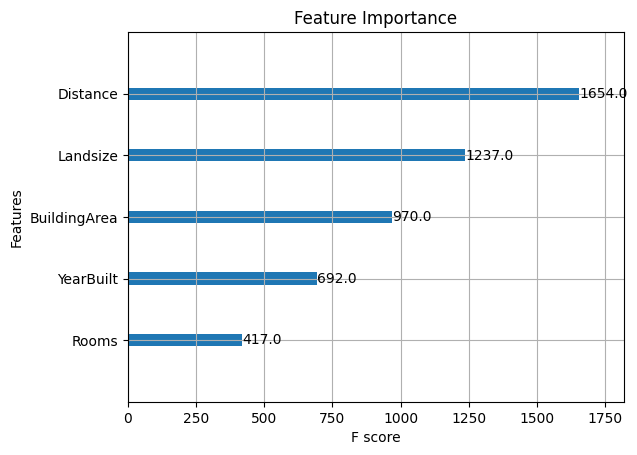

In [27]:
# Mengimpor matplotlib.pyplot untuk pembuatan visualisasi dan fungsi plot_importance dari xgboost untuk menampilkan kepentingan fitur
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Membuat plot untuk menampilkan *feature importance* atau kepentingan fitur dalam model
plt.figure(figsize=(10, 8))  # Mengatur ukuran plot menjadi 10x8 untuk tampilan yang jelas

# plot_importance digunakan untuk menampilkan fitur-fitur yang paling penting dalam model
# model_custom adalah model XGBoost yang telah dilatih
# importance_type='weight' menampilkan jumlah total kontribusi (jumlah split) dari setiap fitur dalam model
plot_importance(model_custom, importance_type='weight')

# Menambahkan judul pada plot untuk memperjelas isi visualisasi
plt.title('Feature Importance')

# Menampilkan plot kepentingan fitur
plt.show()


### **2. Visualisasi Struktur Pohon**

<Figure size 2000x1000 with 0 Axes>

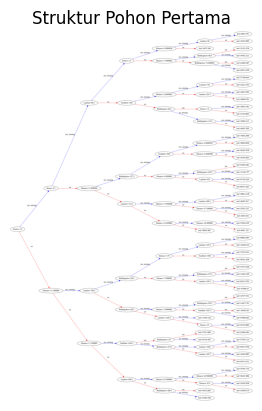

In [26]:
# Mengimpor fungsi plot_tree dari pustaka xgboost untuk memvisualisasikan struktur pohon
from xgboost import plot_tree

# Membuat visualisasi struktur pohon pertama dalam model
plt.figure(figsize=(20, 10))  # Mengatur ukuran plot menjadi 20x10 untuk tampilan yang lebih jelas

# plot_tree digunakan untuk menampilkan struktur pohon dari model XGBoost
# num_trees=0 menunjukkan bahwa kita ingin menampilkan pohon pertama dalam model (indeks 0)
# rankdir='LR' mengatur arah pohon dari kiri ke kanan (Left to Right)
plot_tree(model_custom, num_trees=0, rankdir='LR')

# Menambahkan judul untuk plot
plt.title('Struktur Pohon Pertama')

# Menampilkan plot
plt.show()



In [25]:
# Melatih model XGBoost (model_custom) dengan parameter khusus, termasuk early stopping dan evaluasi dua set data
model_custom.fit(
    X_train, y_train,  # Data pelatihan untuk fitur (X_train) dan target (y_train)

    # early_stopping_rounds=10 akan menghentikan pelatihan jika tidak ada peningkatan pada metrik evaluasi
    # selama 10 epoch berturut-turut pada data validasi
    early_stopping_rounds=10,

    # eval_set mendefinisikan data yang digunakan untuk memantau kinerja model selama pelatihan
    # Di sini, kita memberikan data pelatihan (X_train, y_train) dan data validasi (X_valid, y_valid)
    eval_set=[(X_train, y_train), (X_valid, y_valid)],  # Memastikan ada dua set data dalam evaluasi

    # eval_metric menentukan metrik evaluasi yang akan digunakan untuk menilai kinerja model
    # Di sini kita menggunakan 'rmse' (Root Mean Square Error) untuk memantau kesalahan model
    eval_metric='rmse',  # Pastikan menggunakan 'rmse' sebagai metrik evaluasi

    # verbose=False menonaktifkan output log selama pelatihan, sehingga lebih ringkas
    verbose=False
)



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=90, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

## **3. Learning Curve**

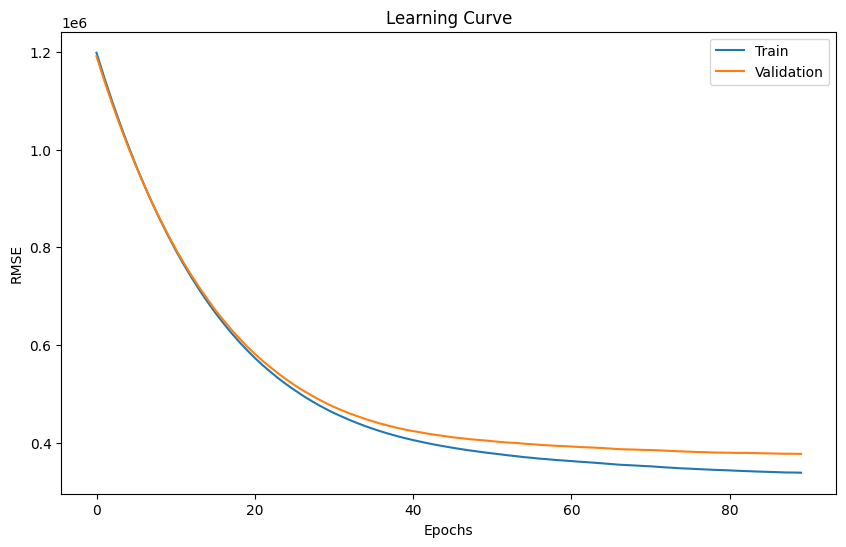

In [24]:
# Mengimpor numpy untuk operasi numerik dan mean_absolute_error dari sklearn untuk menghitung kesalahan prediksi
import numpy as np
from sklearn.metrics import mean_absolute_error

# Mengambil hasil evaluasi dari model XGBoost yang telah dilatih
# evals_result() mengembalikan metrik evaluasi (seperti RMSE) yang dihitung selama pelatihan
eval_results = model_custom.evals_result()

# Menghitung jumlah epoch (iterasi pelatihan) berdasarkan panjang hasil evaluasi pada set 'validation_0'
epochs = len(eval_results['validation_0']['rmse'])  # Memastikan metrik yang digunakan adalah 'rmse'

# Membuat array dari 0 hingga jumlah epoch untuk sumbu x pada grafik
x_axis = range(0, epochs)

# Membuat grafik learning curve untuk memvisualisasikan kinerja model di setiap epoch
plt.figure(figsize=(10, 6))  # Menentukan ukuran plot
plt.plot(x_axis, eval_results['validation_0']['rmse'], label='Train')  # Plot hasil pelatihan

# Memeriksa apakah hasil evaluasi untuk set 'validation_1' ada, untuk ditampilkan dalam plot
if 'validation_1' in eval_results:
    plt.plot(x_axis, eval_results['validation_1']['rmse'], label='Validation')  # Plot hasil validasi jika tersedia
else:
    print("Warning: 'validation_1' not found in eval_results. Plotting only 'validation_0'.")  # Peringatan jika tidak ada data validasi

# Menetapkan label untuk sumbu x dan y, judul plot, dan legenda untuk membedakan data pelatihan dan validasi
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()

# Menampilkan plot learning curve
plt.show()


### **4. Visualisasi SHAP Values**

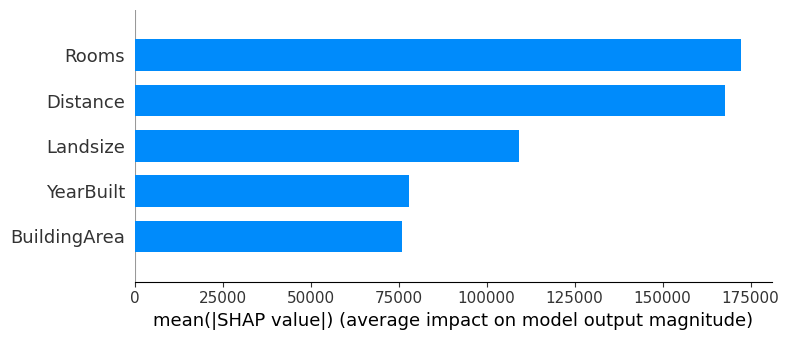

In [23]:
# Mengimpor pustaka SHAP yang digunakan untuk interpretasi model berbasis pohon seperti XGBoost
import shap

# Membuat objek explainer untuk menghitung SHAP values pada model
# TreeExplainer adalah pengklasifikasian khusus untuk model berbasis pohon (tree-based models) seperti XGBoost
explainer = shap.TreeExplainer(model_custom)

# Menghitung SHAP values pada data validasi untuk interpretasi lebih lanjut
# SHAP values memberikan wawasan tentang seberapa banyak setiap fitur berkontribusi pada prediksi
shap_values = explainer.shap_values(X_valid)

# Membuat visualisasi ringkasan (summary plot) dari SHAP values untuk memahami kontribusi masing-masing fitur
# plot_type="bar" menampilkan nilai SHAP dalam bentuk bar chart berdasarkan pengaruh rata-rata setiap fitur
shap.summary_plot(shap_values, X_valid, plot_type="bar")



## **5. Partial Dependence Plot**

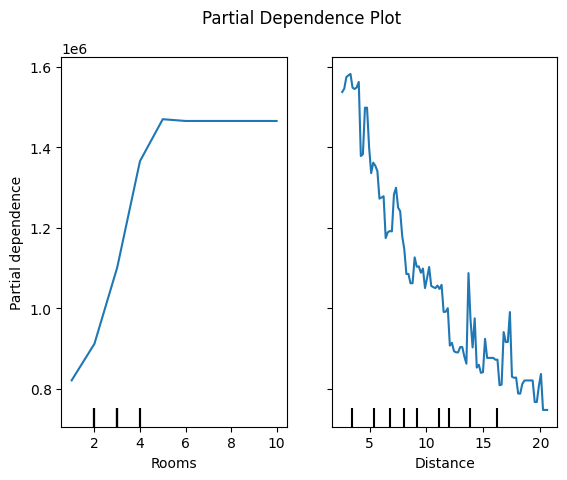

In [22]:
# Mengimpor modul PartialDependenceDisplay dari sklearn untuk membuat Partial Dependence Plot
from sklearn.inspection import PartialDependenceDisplay

# Mendefinisikan fitur yang ingin divisualisasikan dalam Partial Dependence Plot
features_to_plot = ['Rooms', 'Distance']  # Fitur 'Rooms' dan 'Distance' dipilih untuk analisis

# Membuat Partial Dependence Plot menggunakan estimator (model) yang telah dilatih
# Fungsi from_estimator digunakan untuk membuat PDP dari model yang telah dilatih
PartialDependenceDisplay.from_estimator(model_custom, X_train, features_to_plot)

# Memberikan judul untuk keseluruhan plot
plt.suptitle('Partial Dependence Plot')  # Judul plot utama agar lebih informatif

# Menampilkan plot
plt.show()  # Menampilkan Partial Dependence Plot di output

